# 

# Study on the Bird Collision Analysis 

### pandas library for data cleansing and analysis ; matplotlib, seaborn to plot the data

In [1]:
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
print("Please select the input path with '/' as separator")

input_path = '/Users/narayan/Downloads/TakeHomeAssignment/Python-Chicago_bird_collision_data'

Please select the input path with '/' as separator


### List the json files in the given input directory

In [3]:
file_list = list(filter(lambda x: '.json' in x, os.listdir(input_path)))

In [4]:
chicago_collision_data = pd.read_json(input_path + '/' + str(file_list[0]))
flight_call = pd.read_json(input_path + '/' + str(file_list[1]))
light_levels = pd.read_json(input_path + '/' + str(file_list[2]))

In [5]:
chicago_collision_data.head()

,Genus,Species,Date,Locality
0,Ammodramus,nelsoni,1982-10-03,MP
1,Ammodramus,nelsoni,1984-05-21,CHI
2,Ammodramus,nelsoni,1984-05-25,MP
3,Ammodramus,nelsoni,1985-10-08,MP
4,Ammodramus,nelsoni,1986-09-10,MP


In [5]:
chicago_collision_data.to_excel('/Users/narayan/Downloads/TakeHomeAssignment/out.xlsx')

In [8]:
flight_call.head()

,Species,Family,Collisions,Flight,Call,Habitat,Stratum
0,Zonotrichia,albicollis,Passerellidae,10133,Yes,Forest,Lower
1,Junco,hyemalis,Passerellidae,6303,Yes,Edge,Lower
2,Melospiza,melodia,Passerellidae,5124,Yes,Edge,Lower
3,Melospiza,georgiana,Passerellidae,4910,Yes,Open,Lower
4,Seiurus,aurocapilla,Parulidae,4580,Yes,Forest,Lower


In [9]:
light_levels.head()

,Date,Light Score
0,2010-09-26,4.0
1,2015-05-07,6.0
2,2012-03-07,NaN
3,2000-09-18,15.0
4,2000-11-10,15.0


### Rename the column names in the flights dataset

In [14]:
flight_call_clean = flight_call.rename(columns={"Species": "Genus", "Family": "Species"}, errors=False)
flight_call_clean.head()

,Genus,Species,Collisions,Flight,Call,Habitat,Stratum
0,Zonotrichia,albicollis,Passerellidae,10133,Yes,Forest,Lower
1,Junco,hyemalis,Passerellidae,6303,Yes,Edge,Lower
2,Melospiza,melodia,Passerellidae,5124,Yes,Edge,Lower
3,Melospiza,georgiana,Passerellidae,4910,Yes,Open,Lower
4,Seiurus,aurocapilla,Parulidae,4580,Yes,Forest,Lower


### Let's check the data and see how many unique values are there

In [18]:
chicago_collision_data.describe(include='all')

,Genus,Species,Date,Locality
count,69784,69784,69784,69784
unique,43,84,5318,2
top,Melospiza,albicollis,2013-10-08 00:00:00,MP
freq,12063,10133,364,36315
first,NaN,NaN,1978-09-15 00:00:00,NaN
last,NaN,NaN,2016-11-30 00:00:00,NaN


In [19]:
flight_call_clean.describe(include='all')

,Genus,Species,Collisions,Flight,Call,Habitat,Stratum
count,96,96,96,96.000000,96,96,96
unique,52,84,15,NaN,5,6,3
top,Setophaga,americana,Parulidae,NaN,Yes,Forest,Upper
freq,15,3,32,NaN,62,44,52
mean,NaN,NaN,NaN,807.927083,NaN,NaN,NaN
std,NaN,NaN,NaN,1602.275587,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,17.500000,NaN,NaN,NaN
50%,NaN,NaN,NaN,177.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,742.000000,NaN,NaN,NaN


In [21]:
light_levels.describe(include='all')

,Date,Light Score
count,3236,3236.000000
unique,3062,NaN
top,2015-10-28 00:00:00,NaN
freq,2,NaN
first,2000-03-06 00:00:00,NaN
last,2018-05-26 00:00:00,NaN
mean,NaN,10.338690
std,NaN,5.279244
min,NaN,3.000000
25%,NaN,4.000000


### Combine the dataframes based on matched columns 

In [23]:
summarized_mergedf = (
    chicago_collision_data
    .merge(flight_call_clean)  # merge the collision dataframe with clean flight dataframe
).rename(columns= {"Collisions": "Family", "Call": "Flight Call"}).dropna()
summarized_mergedf.head()

,Genus,Species,Date,Locality,Family,Flight,Flight Call,Habitat,Stratum
0,Passerculus,sandwichensis,1978-10-27,MP,Passerellidae,274,yes,open,Lower\t
1,Passerculus,sandwichensis,1979-10-23,MP,Passerellidae,274,yes,open,Lower\t
2,Passerculus,sandwichensis,1980-04-19,MP,Passerellidae,274,yes,open,Lower\t
3,Passerculus,sandwichensis,1981-09-23,MP,Passerellidae,274,yes,open,Lower\t
4,Passerculus,sandwichensis,1982-05-20,MP,Passerellidae,274,yes,open,Lower\t


In [25]:
summarized_mergedf['Stratum'] = summarized_mergedf['Stratum'].str.strip('\t')

In [28]:
summarized_mergedf['total_count'] = 1

### Most birds in collision are happend to have the flight call. 

In [39]:
summarized_mergedf.groupby('Flight Call').size()

Flight Call
No       1517
Rare       86
Yes     65837
no         60
yes      5144
dtype: int64

<AxesSubplot:xlabel='year'>

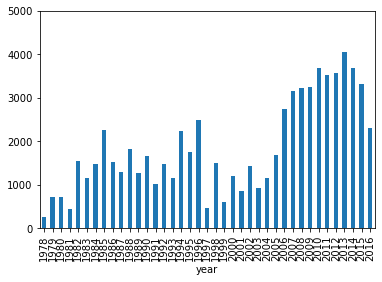

In [44]:
summarized_mergedf['year'] = [x.year for x in summarized_mergedf['Date']]

summarized_mergedf.groupby('year')\
        .count()\
        ['total_count']\
        .plot(kind='bar',xlim=(0,40),ylim=(0,5000))

### Plotting most common birds Genus in collisions

<AxesSubplot:xlabel='Genus'>

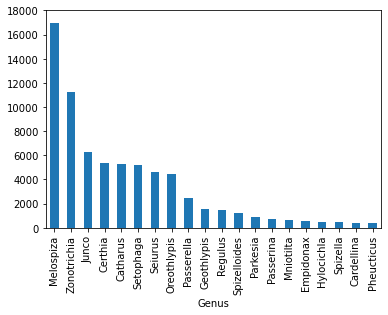

In [37]:
summarized_mergedf.groupby('Genus')\
        .count()\
        .sort_values('total_count',ascending=False)\
        ['total_count'][:20]\
        .plot(kind='bar',xlim=(0,40),ylim=(0,18000))

### Plotting most common bird Species in collisions

<AxesSubplot:xlabel='Species'>

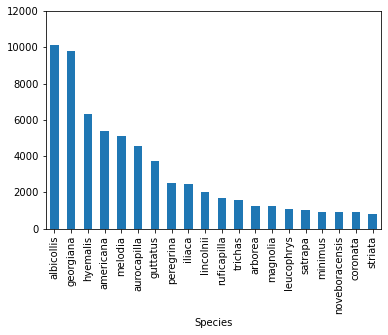

In [38]:
summarized_mergedf.groupby('Species')\
        .count()\
        .sort_values('total_count',ascending=False)\
        ['total_count'][:20]\
        .plot(kind='bar',xlim=(0,40),ylim=(0,12000))

### Plotting most common bird Family in collisions

<AxesSubplot:xlabel='Family'>

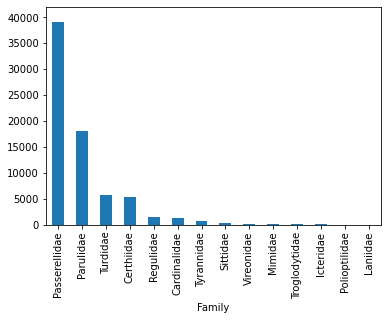

In [35]:
summarized_mergedf.groupby('Family')\
        .count()\
        .sort_values('total_count',ascending=False)\
        ['total_count'][:20]\
        .plot(kind='bar',xlim=(0,40),ylim=(0,42000))